<div style="display: flex; align-items: center;margin-bottom: 30px;color: #8EB944">
    <img src=https://wisoinbox.uni-koeln.de/images/wiso_button_en.png width="80"> 
    <span style="margin-left: 20px;font-size: 50px;font-weight:bold";>Group Project: Predictive Analytics</span>
</div>

<div>
    <span style="font-size: 20px;font-weight: bold";>Group Members:</span>

<ul>
    <li>Tom Boerrigter | 7419077</li>
    <li>Niklas Sterz | 7419545</li>
</ul>
</div>

# Day 1

In [2]:
#Import the most important libraries 
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.pyplot import subplots
import seaborn as sns
from ISLP.models import (ModelSpec as MS,
summarize , poly)
import graphviz
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import time
%matplotlib inline 

### Load the Data for CitiBike

In [3]:
rides_daily = pd.read_csv('rides_daily.csv')
rides_daily

,hour,num_rides,cloudcover,dew,feelslike,feelslikemax,feelslikemin,humidity,moonphase,precip,...,temp,tempmax,tempmin,uvindex,visibility,winddir,windgust,windspeed,weekday,month
0,0,10.0,34.0,-4.3,-0.1,2.8,-2.8,56.8,0.17,0.77,...,3.6,5.0,1.7,2.0,16.0,270.4,47.9,30.8,Wed,Jan
1,1,14.0,34.0,-4.3,-0.1,2.8,-2.8,56.8,0.17,0.77,...,3.6,5.0,1.7,2.0,16.0,270.4,47.9,30.8,Wed,Jan
2,2,9.0,34.0,-4.3,-0.1,2.8,-2.8,56.8,0.17,0.77,...,3.6,5.0,1.7,2.0,16.0,270.4,47.9,30.8,Wed,Jan
3,3,6.0,34.0,-4.3,-0.1,2.8,-2.8,56.8,0.17,0.77,...,3.6,5.0,1.7,2.0,16.0,270.4,47.9,30.8,Wed,Jan
4,4,2.0,34.0,-4.3,-0.1,2.8,-2.8,56.8,0.17,0.77,...,3.6,5.0,1.7,2.0,16.0,270.4,47.9,30.8,Wed,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23347,19,368.0,32.6,14.7,24.7,28.2,21.2,58.2,0.09,0.59,...,24.8,29.2,21.2,9.0,15.5,299.9,38.9,31.7,Wed,Aug
23348,20,249.0,32.6,14.7,24.7,28.2,21.2,58.2,0.09,0.59,...,24.8,29.2,21.2,9.0,15.5,299.9,38.9,31.7,Wed,Aug
23349,21,150.0,32.6,14.7,24.7,28.2,21.2,58.2,0.09,0.59,...,24.8,29.2,21.2,9.0,15.5,299.9,38.9,31.7,Wed,Aug
23350,22,122.0,32.6,14.7,24.7,28.2,21.2,58.2,0.09,0.59,...,24.8,29.2,21.2,9.0,15.5,299.9,38.9,31.7,Wed,Aug


# a)

### Create an overview table that contains a short description of each variable 

In [3]:
# Combine the information into a new DataFrame
with warnings.catch_warnings(): 
    warnings.filterwarnings("ignore", category=UserWarning)
    result_table = pd.DataFrame({
        'Datatype': rides_daily.dtypes,
        'Missing Values': rides_daily.isnull().sum(),
        'Unique Values': rides_daily.nunique(),
        'Min': rides_daily.min(),
        'Max': rides_daily.max(),
        'Mean': rides_daily.mean(numeric_only = True).round(4),
        'Standard Deviation': rides_daily.std(numeric_only = True).round(4),

    })

# Apply a custom style to the DataFrame (Use the WISO-Green for the header)
styled_df = result_table.style
styled_df = styled_df.set_table_styles([
    {'selector': 'thead', 'props': 'background-color: #91BA44; color: #000000;'},
    {'selector': 'th', 'props': 'text-align: center;'},
    {'selector': 'td', 'props': 'text-align: center;'},
])
# Display the styled DataFrame
styled_df

,Datatype,Missing Values,Unique Values,Min,Max,Mean,Standard Deviation
cloudcover,float64,0,471,0.100000,100.000000,26.201100,20.052900
dew,float64,0,338,-18.700000,23.400000,6.940800,10.034500
feelslike,float64,0,363,-14.900000,34.700000,13.662500,10.578600
feelslikemax,float64,0,339,-11.500000,41.200000,18.453400,10.934200
feelslikemin,float64,0,304,-20.300000,29.600000,9.464800,10.797800
hour,int64,0,24,0,23,11.500000,6.922300
humidity,float64,0,462,24.300000,94.500000,63.307600,14.345300
month,object,0,12,Apr,Sep,nan,nan
moonphase,float64,0,101,0.000000,1.000000,0.500200,0.309500
num_rides,float64,0,430,0.000000,492.000000,66.873500,76.398700


# b)

### How many days worth of data have we got?

In [4]:
# Check which values the hour variable can take
hour_counts = rides_daily['hour'].value_counts()
hour_counts = hour_counts.reset_index()
hour_counts.columns = ['hour', 'count']
print(hour_counts)

    hour  count
0      0    973
1      1    973
2     22    973
3     21    973
4     20    973
5     19    973
6     18    973
7     17    973
8     16    973
9     15    973
10    14    973
11    13    973
12    12    973
13    11    973
14    10    973
15     9    973
16     8    973
17     7    973
18     6    973
19     5    973
20     4    973
21     3    973
22     2    973
23    23    973


The hour variable contains 24 unique values, one for each hour. Furthermore, every hour appears 973 times, indicating that the dataset contains 973 days,
or approximately 2.7 years worth of data.

# c)

###  Do we have the same number of observations for each hour and day?

In [5]:
hour_counts = rides_daily['weekday'].value_counts()/24
hour_counts = hour_counts.reset_index()
hour_counts.columns = ['weekday', 'count']
print(hour_counts)

  weekday  count
0     Wed  140.0
1     Thu  139.0
2     Fri  139.0
3     Sat  139.0
4     Sun  139.0
5     Mon  139.0
6     Tue  138.0


If we take a look at the data, we find that they are in the right order, eg. every tuesday is followed by a wednesday etc. Furthermore, the dataset contains 138 full weeks and starts on a wednesday and ends on a wednesday. This is why wednesday occurs 140 instead of 139 times. It also appears that there is one Tuesday missing. Additionally, we can see in b) that the dataset contains 973 observations for each hour. If the hours with no rides were missing from the dataset, this would push the average up, since the denominator increases while the enumerator does not change.

In [6]:
# Find sequences where 'Wed' follows 'Mon'
mask = (rides_daily['weekday'] == 'Mon') & (rides_daily['weekday'].shift(-1) == 'Wed')
result = rides_daily[mask]
if not result.empty:
    # Get the index as an integer
    idx = int(result.index.item())
    print("Index where 'Wed' follows 'Mon':", idx)
else:
    print("No 'Wed' follows 'Mon' sequence found.")
rides_daily.iloc[idx:idx+2]

Index where 'Wed' follows 'Mon': 9551


,hour,num_rides,cloudcover,dew,feelslike,feelslikemax,feelslikemin,humidity,moonphase,precip,...,temp,tempmax,tempmin,uvindex,visibility,winddir,windgust,windspeed,weekday,month
9551,23,0.0,46.8,-3.7,-0.4,3.8,-4.6,71.8,0.68,0.01,...,1.0,3.8,-1.2,4.0,15.1,319.5,50.0,11.3,Mon,Feb
9552,0,0.0,46.8,-3.7,-0.4,3.8,-4.6,71.8,0.68,0.01,...,1.0,3.8,-1.2,4.0,15.1,319.5,50.0,11.3,Wed,Feb


Here, one can clearly see that a wednesday follows on a monday in the data, this indicates that one tuesday must be missing.

# d)

### Create four meaningful charts (a bar chart, a histogram, a boxplot, a scatter plot)

Text(0.5, 1.0, 'Distribution of Number of Rides by hour')

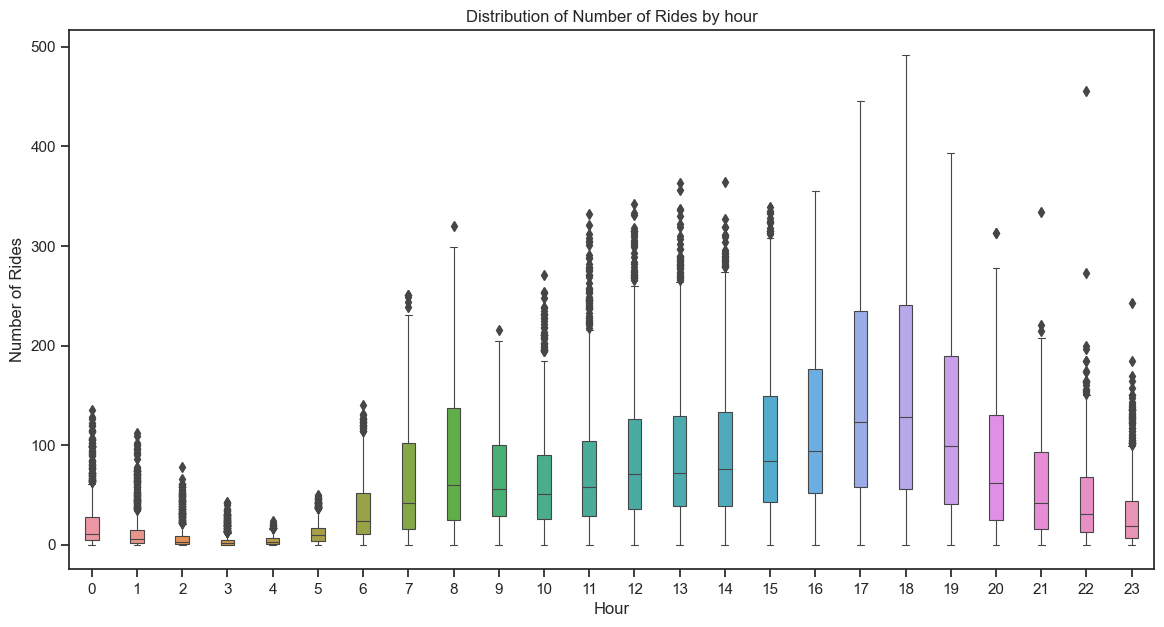

In [22]:
sns.set_theme(style="ticks", palette="pastel") # select custom colour theme
plt.figure(figsize=(14,7)) #set size of the figure

# create boxplot 
ax= sns.boxplot(x=rides_daily['hour'],y=rides_daily['num_rides'], orient='v',
            width=.3,linewidth=.8)
plt.xlabel("Hour")
plt.ylabel("Number of Rides")
plt.title("Distribution of Number of Rides by hour")

Interpretation: The Boxplot displays the distribution of the  number of rides by the discrete hour variable.
The colored boxes represent the middle 50 % of the data, that is, the 25% above and below the median value. The black diamonds represent outliers. 
This particular boxplot shows that the  number of rides increases during the morning hours, peaks in the evening and then decreases again after sunset. During commuting hours, the number of rides is fairly stable with only few outliers.
In the night and the afternoon there are much more outliers, indicating, that on some days many people rent bikes during less common hours. 

Text(0, 0.5, 'Mean Number of Rides')

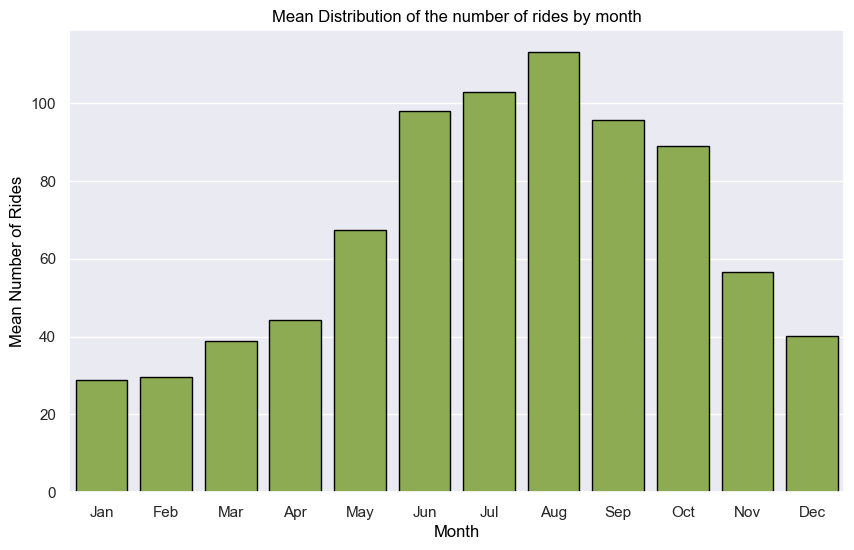

In [21]:
# Sort the month so that they are in the right order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
rides_daily['month'] = pd.Categorical(rides_daily['month'], categories=month_order, ordered=True)

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='num_rides', data=rides_daily, errorbar=None, color = '#91BA44', edgecolor='black')

# Customize the plot
plt.title('Mean Distribution of the number of rides by month', color = 'black')
plt.xlabel('Month', color = 'black')
plt.ylabel('Mean Number of Rides', color = 'black')

Interpretation: The bar-chart displays the mean number of rides by the month. The plot confirms the intuition of the guru that people rarely cycle during the the winter months. The three lowest average number of rides per month occur in January, February and December. The average number of rides increases during the spring and summer months, peaks in August and decreases with the onset of autumn.

Text(0, 0.5, 'Frequency')

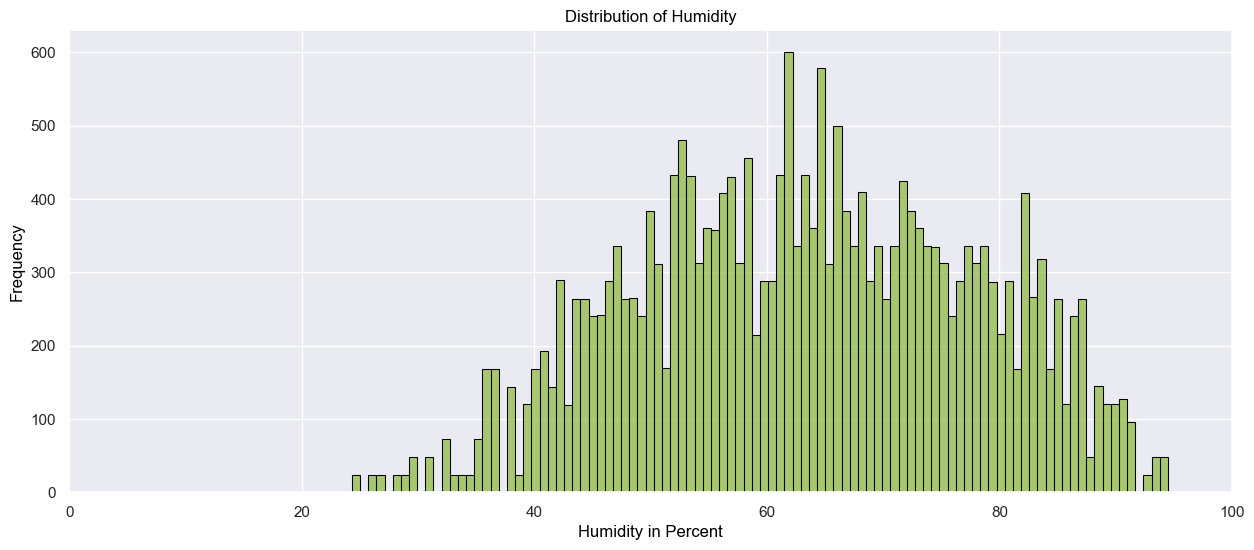

In [20]:
# Create a histogram using Seaborn
plt.figure(figsize=(15, 6))
sns.histplot(rides_daily['humidity'], bins=100, kde=False, color='#91BA44', edgecolor='black')

# Customize the plot
plt.xlim(0,100)
plt.title('Distribution of Humidity', color='black')
plt.xlabel('Humidity in Percent', color='black')
plt.ylabel('Frequency', color='black')

Interpretation: The histogram displays the distribution of the absolute frequencies of the humidity in the sample. The range of observed values for that is 20 to 95.
The majority of values lie between 40 and 80, though. Studying the distribution of the humidity can be used as preparation before analysing the relationship betweeen humidity and the number of rides. One would assume that on very dry or humid days people are not inclined to ride a bike. Looking at the distribution of humidity might help with defining binary variables for very humid or dry days.

Text(0, 0.5, 'Average Number of Rides')

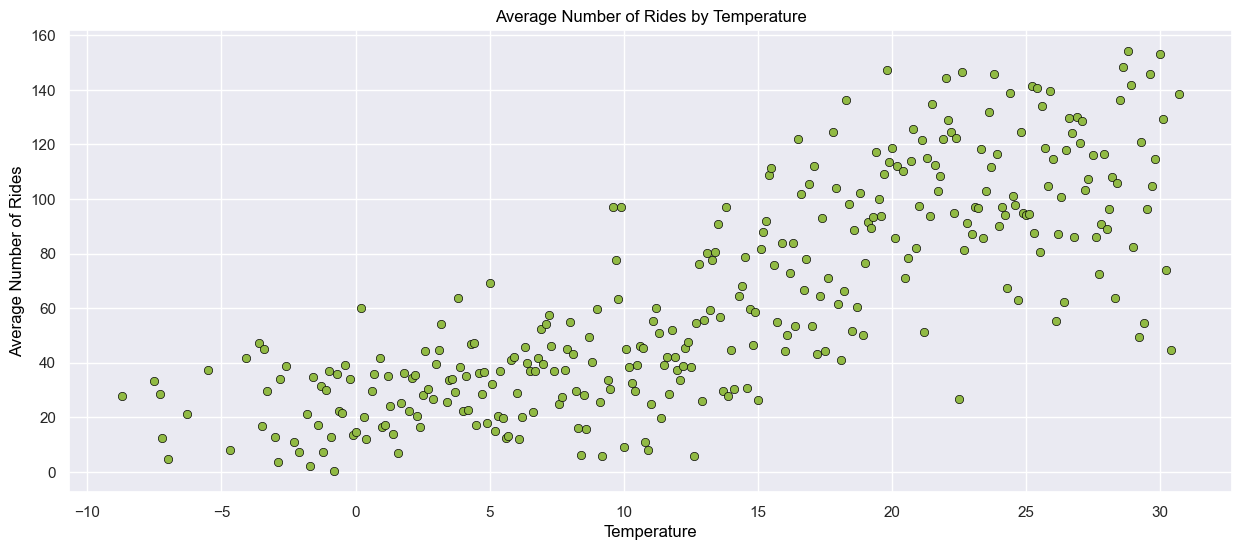

In [19]:
# Group by 'temperature' and calculate the mean number of rides for each group
Average_Number_of_Rides_by_Temperature = rides_daily.groupby('temp')['num_rides'].mean().reset_index()

# Create a scatter plot using Seaborn
plt.figure(figsize=(15, 6))
sns.scatterplot(x='temp', y='num_rides', data=Average_Number_of_Rides_by_Temperature, color='#91BA44', edgecolor='black')

# Customize the plot
plt.title('Average Number of Rides by Temperature', color='black')
plt.xlabel('Temperature', color='black')
plt.ylabel('Average Number of Rides', color='black')


Interpretation: The scatterplot displays the relationship between the average number of rides and the average temperature. The plot shows that there is a positive correlation between these two variables, albeit not a perfect one. On average, there more bike rides on warmer days, although, there are quite a few outliers.

# e)

### Interpret three meaningful pairplots.

Text(0.5, 1.02, 'Relationship between Temperature and sun intensity')

<Figure size 1600x700 with 0 Axes>

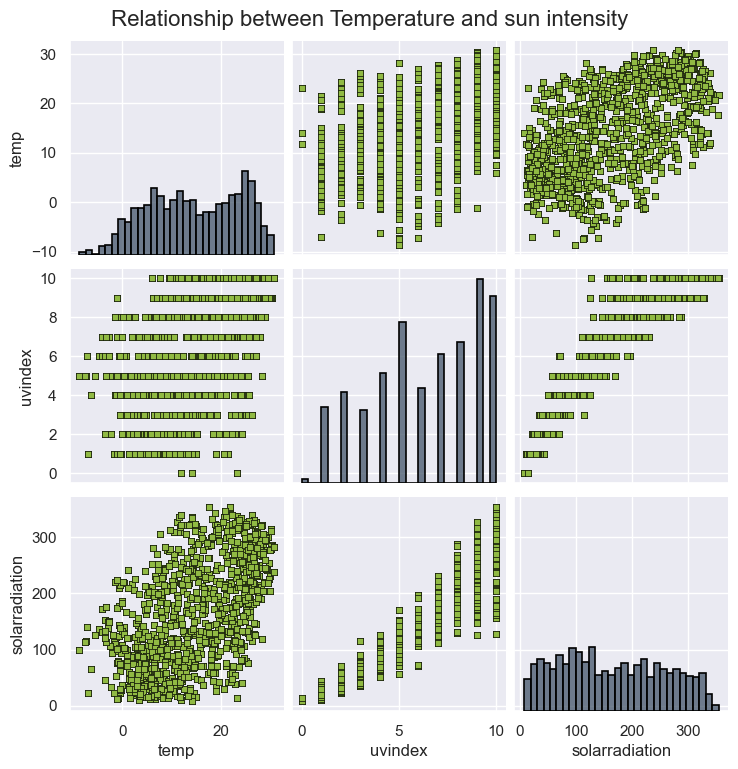

In [14]:
sns.set_style("darkgrid")  

custom_dict1 =    { 's': 15,            # Marker size
    'alpha': 0.9,       # Transparency
    'marker': ',',      # Marker style
    'c': '#91BA44',     # Marker color
    'edgecolor': 'black',  # Edge color for markers
    'linewidth': 0.4 }   
 
custom_dict2={'color': '#43556A', 'edgecolor': 'black', 'linewidth': 1.2, 'bins': 30}

# Set the figure size before calling pairplot
plt.figure(figsize=(16, 7))

# Use pairplot with vars parameter to specify the columns
sns.pairplot(rides_daily[['temp', 'uvindex', 'solarradiation']] ,plot_kws=custom_dict1, diag_kind='hist',diag_kws=custom_dict2)
plt.suptitle('Relationship between Temperature and sun intensity', y=1.02, fontsize=16)

Interpretation: This pairplot compares temperature with the intensity of the sun at every hour. The bottom middle scatterplot clearly shows a relationship betweeen Solar Radiation and UV-Index, which is to be expected since they are nearly perfectly correlated. A higher UV-Index therefore means a higher Solar Radiation and vice versa. The relationship of the two variables with temperature seems to be a lot more interesting. Both plots including temperature suggest that there is a connection between the variables, as there are no data points with low temperature and simultaneously low UV-Index or Solar Radiation, but the plot is fairly spread out. This means that there are hours with a high temperature but low UV-Index. This might be due to a cloudy day. The three plots on the diagonale show the histograms of the variables. The bars for 'temp' are well spread out, indicating that we have many days with distinct temperatures. The histogram for 'uvindex' shows that most days in our sample had a uvindex of higher than 5. The values  for 'solarradition' are evenly distributed around roughly 150.

Text(0.5, 1.02, 'Relationship between humidity, rain and dew')

<Figure size 1600x700 with 0 Axes>

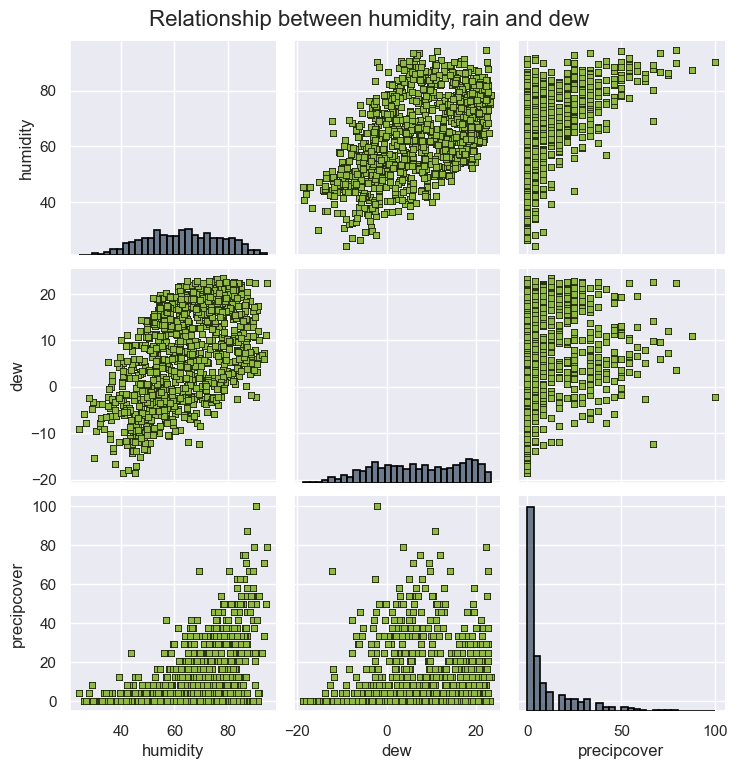

In [15]:
sns.set_style("darkgrid")  

custom_dict1 =    { 's': 15,            # Marker size
    'alpha': 0.9,       # Transparency
    'marker': ',',      # Marker style
    'c': '#91BA44',     # Marker color
    'edgecolor': 'black',  # Edge color for markers
    'linewidth': 0.4 }   
 
custom_dict2={'color': '#43556A', 'edgecolor': 'black', 'linewidth': 1.2, 'bins': 30}

# Set the figure size before calling pairplot
plt.figure(figsize=(16, 7))

# Use pairplot with vars parameter to specify the columns
sns.pairplot(rides_daily[['humidity', 'dew', 'precipcover']] ,plot_kws=custom_dict1, diag_kind='hist',diag_kws=custom_dict2)
plt.suptitle('Relationship between humidity, rain and dew', y=1.02, fontsize=16)

Interpretation: This pairplot shows the realtionship between the dew point, the precipitation coverage, which tells us the percentage of time during each hour that it will rain, and the humidity. There seems to be a strong relationship between humidity and dew, which is to be expected since a higher dew point equals higher humidity. There is also obvious correlation between humidity and precipitation coverage. Nevertheless, there are points where the humidity is high but it didn't rain, meaning there are probably other factors at play which influence humidity. The histograms on the diagonale show that on most days there has been or just a bit of rain. Further, the humidity distribution looks like normal distribution with a high kurtosis. That is most days had a humidity between 40 and 80 with the of around 60. The 'dew' variable looks evenly distributed around 0 degrees, since there are fewer observations where the temperature was below 0 degrees, it is not surprising that we have fewer observations for 'dew' below 0 degrees.

Text(0.5, 1.02, 'Relationship between humidity, rain and dew')

<Figure size 1600x700 with 0 Axes>

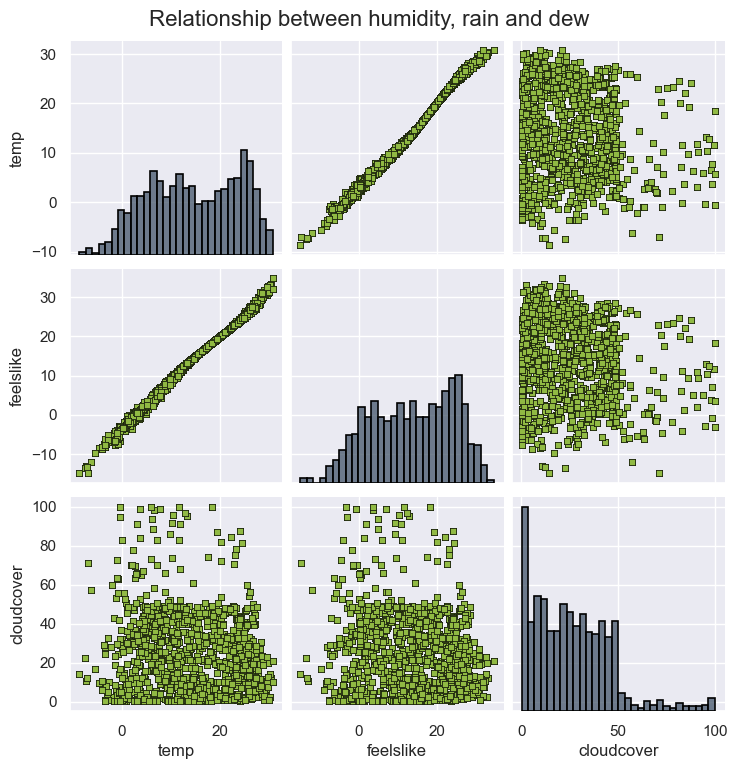

In [18]:
sns.set_style("darkgrid")  

custom_dict1 =    { 's': 15,   # Marker size
    'alpha': 0.9,       # Transparency
    'marker': ',',      # Marker style
    'c': '#91BA44',     # Marker color
    'edgecolor': 'black',  # Edge color for markers
    'linewidth': 0.4 }   
 
custom_dict2={'color': '#43556A', 'edgecolor': 'black', 'linewidth': 1.2, 'bins': 30}

# Set the figure size 
plt.figure(figsize=(16, 7))

# Use pairplot with vars parameter to specify the columns
sns.pairplot(rides_daily[['temp', 'feelslike', 'cloudcover']] ,plot_kws=custom_dict1, diag_kind='hist',diag_kws=custom_dict2)
plt.suptitle('Relationship between humidity, rain and dew', y=1.02, fontsize=16)

Interpretation: This pairplot shows cloudcover, temperature and feelslike. First, feelslike and temperature are closely correlated. Nevertheless, it seems to be the case, that temperatures between roughly 10 and 20 degrees feel a bit warmer and temperatures between 20 and 30 feel a bit warmer. The data doens't tell us if that is really the case or just by chance. Furthermore, more cloud coverage doesn't necessarily indicate a lower temperature, the plot just shows that there are more datapoints with a low cloud coverage. Due to the high correlation the feelslike and temperature plot paired with cloudcover look nearly identical.

# Day 5
# a)
### Simulate 1,000 two-bidder and four-bidder auctions. Plot the results.

In [28]:
auction = pd.read_csv('auction.csv')

In [29]:
'''
We assume that in a auction one person is not allowed to bid against himself. 
Therefore, we write the function below that ensures that we randomly select n distinct bids out of 49 bids in a single simulation.
We repeat this for all simulations.

'''

def calc_choices(n:int,  k:int, df_col:str):
    
    ''' selects n observations from the sample --> put the name of the column to select the prices from as the third function argument.
    
    In each iteration from 0 to k-1 we select n arguments from the sample without replacement.
    After each iteration the sample size will be equal to the original size (49 for the auction dataset).
    This avoids selecting the same observation more than once in an iteration.
    In case one would allow to select the same bidder more than once in a single simulation--> that is, allowing someone to bid against himself,
    they would only have to set  the replace argument to True. Which of course would slightly alter the prices.
    Since the guru did not specify whether this should be the case, we decided to select n distinct prices in each simulation
    
    
    If n = 2 we select 2 out of 49 in each iteration and store a list with dimension (k,2)
     '''
    
    choices = [
        np.random.choice(auction[df_col], size=n, replace=False) 
        for _ in range(k)
    ]
    return np.vstack(choices)


### 2-bidder auction with first-price auction

In [30]:
np.random.seed(122)   # set seed so same numbers will be displayed when running this code on different machines

two_bids_simulation_a = calc_choices(2,1000,'Bid 2-bidder auction') # run function with n=2 and k=1000
bid_auction_2_a = np.max(two_bids_simulation_a,axis=1) #find the maximum bid for each simulated pair

bid_auction_2_a[:20] # display the first 20 simulated auction prices

array([6.2 , 4.7 , 3.5 , 6.83, 5.  , 5.2 , 7.  , 5.2 , 4.7 , 5.  , 4.7 ,
       3.  , 6.  , 2.  , 6.  , 4.7 , 6.83, 6.1 , 7.7 , 4.7 ])

### 4-bidder auction with first-price auction

In [31]:
np.random.seed(122)   # set seed so same numbers will be displayed when running this code on different machines

four_bids_simulation_a = calc_choices(4,1000,'Bid 4-bidder auction') # run function with n=4 and k=1000
bid_auction_4_a=np.max(four_bids_simulation_a,axis=1) #find the maximum bid for each simulated quadruple

bid_auction_4_a[:20] # display the first 20 simulated auction prices

array([ 9.  ,  7.6 ,  8.03,  8.03,  6.7 ,  6.2 ,  9.  , 12.  , 10.  ,
        8.9 ,  5.5 ,  5.  , 10.  ,  7.  , 12.  ,  9.  ,  8.03,  7.  ,
        7.7 ,  7.8 ])

### Plotting the results of the empirical distribution along their respective means

Text(0.5, 1.0, 'Empirical Distribution of 2-bidder vs 4-bidder auctions')

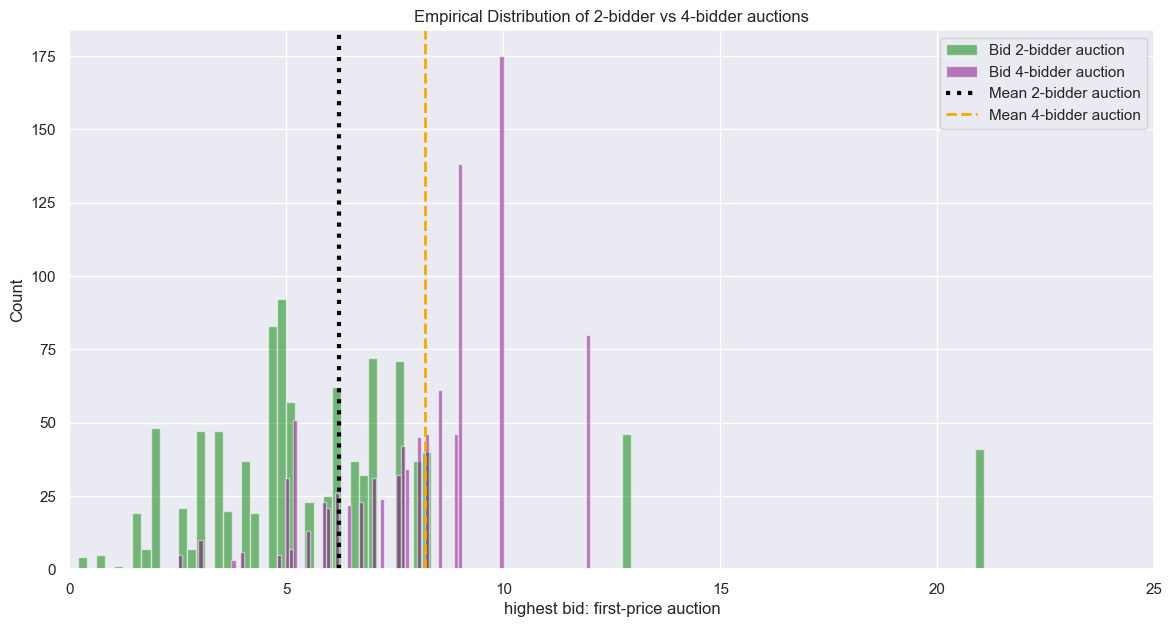

In [32]:
plt.figure(figsize=(14,7))
plt.hist(bid_auction_2_a, bins=100, alpha=0.5, label='Bid 2-bidder auction',color='green') # plot the histogram for the 2-bidder auction
plt.hist(bid_auction_4_a, bins=100, alpha=0.5, label='Bid 4-bidder auction', color='purple') # plot the histogram for the 4-bidder auction
plt.axvline(bid_auction_2_a.mean(), linestyle=':', # plot the mean for the 2-bidder auction
            linewidth=3, color='black', label='Mean 2-bidder auction' )
plt.axvline(bid_auction_4_a.mean(), linestyle='--',  # plot the mean for the 4-bidder auction
            linewidth=2, color='orange', label='Mean 4-bidder auction' )
plt.legend(loc='upper right')   # plot the legend
plt.xlim(0,25)
plt.xlabel('highest bid: first-price auction')
plt.ylabel('Count')
plt.title('Empirical Distribution of 2-bidder vs 4-bidder auctions')

# b)

### With which probability is the price above 8 in a two-bidder auction and in a four- bidder auction, respectively?

### ex-post stochastic probabilities of observing a price greater than 8

In [33]:
# create a dataframe for the simulated prices from a) for the 2-bidder and 4-bidder auctions respectively:
prices_2_bidders_a = pd.DataFrame(bid_auction_2_a, columns=['Price 2-bidders']) 
prices_4_bidders_a = pd.DataFrame(bid_auction_4_a, columns=['Price 4-bidders'])


# calculate the fraction of prices above 8 from the 2-bidder auctions:
p1 = len( prices_2_bidders_a[prices_2_bidders_a['Price 2-bidders']>8]) / len(prices_2_bidders_a) 

# calculate the fraction of prices above 8 from the 4-bidder auctions:
p2 = len( prices_4_bidders_a[prices_4_bidders_a['Price 4-bidders']>8]) / len(prices_4_bidders_a) 

print(f'Probability for a price > 8 in a 2-bidder auction: {round(p1 * 100, 2)}%\nProbability for a price > 8 in a 4-bidder auction: {round(p2 * 100, 2)}%')

#prices_2_bidders_a[prices_2_bidders_a['Price 2-bidders']>8] 

Probability for a price > 8 in a 2-bidder auction: 12.7%
Probability for a price > 8 in a 4-bidder auction: 59.1%


Answer:
Derived from the empirical distributions, we can see that a 2-bidder yields a price of greater than 8 in 12,9% of the simulations, whereas the 4-bidder auction yields such a price in 59,1% of the simulations. So overall, the 4-bidder auction seems to be better for the auction house. Note that these are stochastic probabilities. They will slightly vary when setting a different seed parameter in part a). Repeating the sampling (changing the seed in a loop) and averaging the resulting probabilites would lead to more stable probabilities.

# c)
### Simulate 1,000 two-bidder and four-bidder auctions using participants’ valuations. Illustrate the price distributions for the two and four bidder cases with histograms

In [34]:
def second_price_auction(choices_arr: np.ndarray, index = -2):
    ''' 
    this function takes a numpy.ndarray, sorts each row and returns the second highest element of each row (simulation)
    Note that this function can easily be modified to return the third highest element by changing the index argument to -3 
    however, before doing that, one should check whether the np.ndarray contains at least 3 elements per row,
    since this function is (intentionally) not checking for this potential error.
    '''
    
    sorted_choices = np.sort(choices_arr, axis=1) # sort the elements within each of the inner np.arrays
    
    second_highest_elem = np.array(               # convert the list into a numpy array
        [choice[index] for choice in sorted_choices] # use list comprehension to get the second highest element from each simulation
    )
    return second_highest_elem

## 2-bidder auctions with individual valuations and second-price auction to determine the auction prices

In [35]:
np.random.seed(122)  # set seed so same numbers will be displayed when running this code on different machines


two_bids_simulation_c = calc_choices(2,1000,'Valuation') # simulate 1000 2-bidder auctions using the individual valuations this time
bid_auction_2_c = second_price_auction(two_bids_simulation_c) # determine the prices for  each of the 1000 simulations using the second_price_auction function

bid_auction_2_c[:20] # display the first 20 simulated prices


array([3.3, 1.8, 1.5, 3. , 1.8, 2.1, 7.8, 3. , 5.7, 5.4, 5.7, 1.5, 4. ,
       1.2, 3. , 3.6, 6.6, 3. , 8.1, 5.7])

In [36]:
np.random.seed(122)  # set seed so same numbers will be displayed when running this code on different machines


four_bids_simulation_c = calc_choices(4,1000,'Valuation') # simulate 1000 4-bidder auctions using the individual valuations this time
bid_auction_4_c = second_price_auction(four_bids_simulation_c) # determine the prices for  each of the 1000 simulations using the second_price_auction function

bid_auction_4_c[:10]

array([ 9.6,  6. ,  5.7,  6.6,  5.4,  5.4,  7.8, 10.2,  6.3,  5.7])

## Plotting the results of the empirical distributions along their respective means

Text(0.5, 1.0, 'Empirical Distribution of 2-bidder vs 4-bidder auctions with Valuations (second-price-auction)')

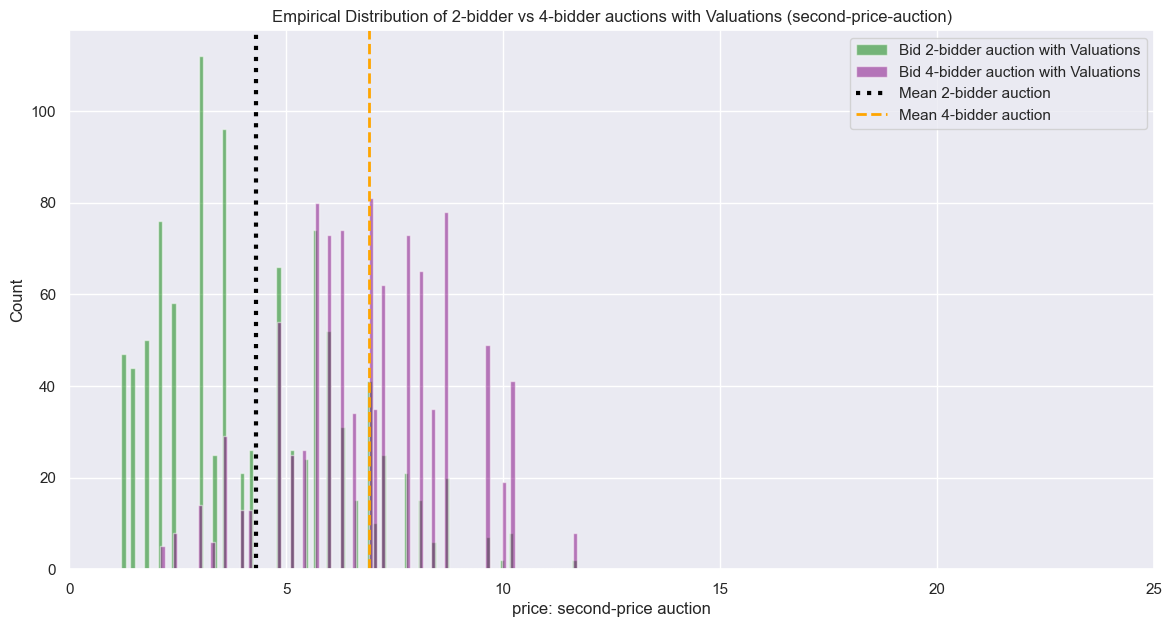

In [37]:
plt.figure(figsize=(14,7))
plt.hist(bid_auction_2_c, bins=100, alpha=0.5, label='Bid 2-bidder auction with Valuations',color='green') # plot the histogram for the 2-bidder auction
plt.hist(bid_auction_4_c, bins=100, alpha=0.5, label='Bid 4-bidder auction with Valuations', color='purple') # plot the histogram for the 4-bidder auction
plt.axvline(bid_auction_2_c.mean(), linestyle=':', # plot the mean for the 2-bidder auction
            linewidth=3, color='black', label='Mean 2-bidder auction' )
plt.axvline(bid_auction_4_c.mean(), linestyle='--', # plot the mean for the 4-bidder auction
            linewidth=2, color='orange', label='Mean 4-bidder auction' )
plt.legend(loc='upper right') # plot the legend 
plt.xlim(0,25)
plt.xlabel('price: second-price auction')
plt.ylabel('Count')
plt.title('Empirical Distribution of 2-bidder vs 4-bidder auctions with Valuations (second-price-auction)')

Takeaway: The second-price auction still yields higher average prices in the 4-bidder auctions than in the 2-bidder auctions. This does not come as a surprise, since the second-price auction selects the minimum bids in a 2-bidder auction instead of the maximum bid. For the 4-bidder auction the mean simulated auction price decreased only slightly compared to a).

# d)
### Do first- and second-price auctions with two bidders yield the same expected prices? Does the variance of prices differ? Conduct the same analysis for auctions with four bidders.

### 2-bidder auction results

In [38]:
# 2-bidder auction first vs. second prices

first_price_2_bidder = bid_auction_2_a # create a copy of the simulated first-auction prices from a) 

second_price_2_bidder = bid_auction_2_c # create a copy of the simulated second-auction prices from c)

# calculate the mean prices as displayed in the plots in a and b
first_price_mean_2 = first_price_2_bidder.mean()
second_price_mean_2 = second_price_2_bidder.mean()

# test if the expected prices are exactly the same
print(f'First- and second-price auctions yield the same expected prices: {first_price_mean_2 == second_price_mean_2}.\n\
Expected price in a first-price auction = {first_price_mean_2.round(4)}.\n\
Expeted price in a second-price auction = {second_price_mean_2.round(4)}.')

# calculate the variance for 2-bidder- and 4-bidder auction
first_price_var_2 = first_price_2_bidder.var()
second_price_var_2 = second_price_2_bidder.var()

# test if the variances are exactly the same
print(f'\n\nFirst- and second-price auctions have the same variance of prices: {first_price_var_2 == second_price_var_2}.\n\
Variance of prices resulting from a first-price auction = {first_price_var_2.round(4)}.\n\
Variance of prices resulting from a second-price auction = {second_price_var_2.round(4)}.')

First- and second-price auctions yield the same expected prices: False.
Expected price in a first-price auction = 6.2073.
Expeted price in a second-price auction = 4.3104.


First- and second-price auctions have the same variance of prices: False.
Variance of prices resulting from a first-price auction = 15.2391.
Variance of prices resulting from a second-price auction = 4.6824.


Answer: The expected prices from the first- and second price auction are not equal. This is not surprising, since the bidders did not know if the final auction prices are determined with the first- or second price metohds and did not bid 2 different prices. And when selecting 2 distinct random bids out of 49, chosing the minimum or maximum bid can make a huge difference.

The variances of prices are not equal either. In fact, the variance of prices resulting from a first-price auction is roughly the three-fold of the one resulting from a second price auction. Again, this is not surprising when looking at the plotted empirical distribution in a) where one can observe a much more spread out density with some huge outliers.

### 4-bidder auction results

In [39]:
# 4-bidder auction first vs. second prices

first_price_4_bidder = bid_auction_4_a # create a copy of the simulated first-auction prices from a) 

second_price_4_bidder = bid_auction_4_c # create a copy of the simulated second-auction prices from c)

# calculate the mean prices as displayed in the plots in a and b
first_price_mean_4 = first_price_4_bidder.mean()
second_price_mean_4 = second_price_4_bidder.mean()

# test if the expected prices are exactly the same
print(f'First- and second-price auctions yield the same expected prices: {first_price_mean_4 == second_price_mean_4}.\n\
Expected price in a first-price auction = {first_price_mean_4.round(4)}.\n\
Expeted price in a second-price auction = {second_price_mean_4.round(4)}.')

# calculate the variance for 2-bidder- and 4-bidder auction
first_price_var_4 = first_price_4_bidder.var()
second_price_var_4 = second_price_4_bidder.var()

# test if the variances are exactly the same
print(f'\n\nFirst- and second-price auctions have the same variance of prices: {first_price_var_4 == second_price_var_4}.\n\
Variance of prices resulting from a first-price auction = {first_price_var_4.round(4)}.\n\
Variance of prices resulting from a second-price auction = {second_price_var_4.round(4)}.')

First- and second-price auctions yield the same expected prices: False.
Expected price in a first-price auction = 8.1882.
Expeted price in a second-price auction = 6.9052.


First- and second-price auctions have the same variance of prices: False.
Variance of prices resulting from a first-price auction = 3.973.
Variance of prices resulting from a second-price auction = 3.3302.


Answer: The expected prices from the first- and second price method are not equal for the 4-bidder auction. Just as in the case of the 2-bidder auction, the expected price from the second-price method is lower. The effect is not as pronounced as for the 2-bidder auction. This might have to with the fact that instead of the minimum the second highest price is achieved in a 4-bidder auction with the second-price method. The gap between the first and second highest price should not be as large in the case of a 4-bidder auction when selecting 4 distinct bids at random.

The variances of prices are not equal either. But unlike in the case 2-bidder auction, the two variance of prices are pretty similar. This is most likely due to the overall lower variance resulting from a 4-bidder auction and also the less pronounced decrease in the mean price resulting from the second-price method.

In summary, the revenue equivalence theorem has not been confirmed with this simulation. The expected prices from the first-price methods are higher for the 2-bidder- and 4-bidder auctions than the prices determined with the second-price method.